## Decision Tree

* Decision tree with Iris xxample
* Comparison of three types of loss functions 
* Decision tree with different pairs 
* Decision tree on regrssion 
* Decision tree with multiple output
* Random forest

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd


In [48]:
def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]

In [73]:
iris_feature = 'sepal length', 'sepal width', 'petal length', 'petal width'
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
path = 'Data-and-Output/8.iris.data'  # data path
#  data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
df = pd.read_csv(path, header = 0)
x = df.values[:, :-1]
y = df.values[:, -1]
x = x[:, :2]  # only select the first two features of x 
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print ('le class: \n',le.classes_)
y = le.transform(y)
print ('Lastest Version, y = \n', y)   # convert y labels 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#ss = StandardScaler()
#ss = ss.fit(x_train)


le class: 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Lastest Version, y = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [74]:
# standardized data 
model = Pipeline([('ss', StandardScaler()),
        ('DTC', DecisionTreeClassifier(criterion='entropy', max_depth=3))])

model = model.fit(x_train, y_train)
y_test_hat = model.predict(x_test)      # test data 
f = open('Data-and-Output/iris_tree.dot', 'w')  # write the file 
tree.export_graphviz(model.get_params('DTC')['DTC'], out_file=f)  # export the file 
f.close()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [75]:
N, M = 100, 100  # sample 100 data points for both x and y axis
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # the first feature as x values 
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # the second feature y values 
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # meshgrid 

x_show = np.stack((x1.flat, x2.flat), axis=1)  # use x1 as the first column , x2 as the second column 
#  stack:   Join a sequence of arrays along a new axis.

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # predicted value on all sample points 
y_show_hat = y_show_hat.reshape(x1.shape)  # has the same shape as x1
# len(y_show_hat)

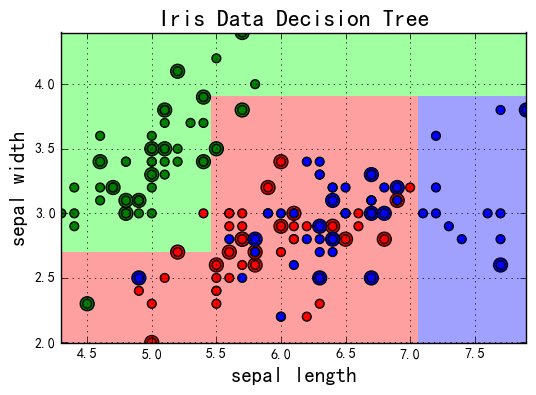

In [78]:
# Add two more features, comment out x = x[:, :2] before using the commented code
# x3 = np.ones(x1.size) * np.average(x[:, 2])
# x4 = np.ones(x1.size) * np.average(x[:, 3])
# x_test = np.stack((x1.flat, x2.flat, x3, x4), axis=1)  

plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # predicted mesh values 
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.ravel(), edgecolors='k', s=100, cmap=cm_dark, marker='o')  # 
plt.scatter(x[:, 0], x[:, 1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'Iris Data Decision Tree', fontsize=17)
plt.show()



In [79]:
y_test = y_test.reshape(-1)
print(y_test_hat)
print(y_test)

[1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 2 1 0 1 0 1 1 1 1 0 1 0 1 1
 2 1 1 1 1 1 0 0]
[2 1 1 1 1 2 1 1 0 1 0 0 1 0 1 0 1 0 1 0 2 2 0 2 2 0 1 0 1 2 2 1 0 2 0 0 2
 2 0 2 2 1 1 0 0]


In [80]:
# Check the accuracy rate 
result = (y_test_hat == y_test)   
acc = np.mean(result)
print ('Accuracy: %.2f%%' % (100 * acc))

Accuracy: 68.89%


In [81]:
# The effect of overfit, try different depth
depth = np.arange(1, 15)
err_list = []
for d in depth:
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
    clf = clf.fit(x_train, y_train)
    y_test_hat = clf.predict(x_test)  # predict on test data 
    result = (y_test_hat == y_test)  # 
    err = 1 - np.mean(result)
    err_list.append(err)
    print(d, ' Error Rate: %.2f%%' % (100 * err))

1  Error Rate: 44.44%
2  Error Rate: 40.00%
3  Error Rate: 31.11%
4  Error Rate: 31.11%
5  Error Rate: 35.56%
6  Error Rate: 35.56%
7  Error Rate: 42.22%
8  Error Rate: 42.22%
9  Error Rate: 46.67%
10  Error Rate: 44.44%
11  Error Rate: 35.56%
12  Error Rate: 40.00%
13  Error Rate: 44.44%
14  Error Rate: 42.22%


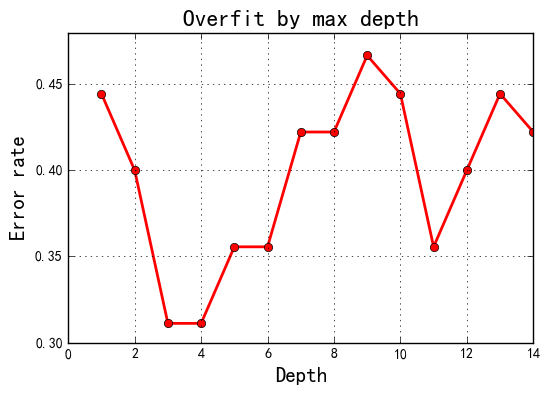

In [82]:
# Plot error rate vs depth 
plt.figure(facecolor='w')
plt.plot(depth, err_list, 'ro-', lw=2)
plt.xlabel(u'Depth', fontsize=15)
plt.ylabel(u'Error rate', fontsize=15)
plt.title(u'Overfit by max depth', fontsize=17)
plt.grid(True)
plt.show()


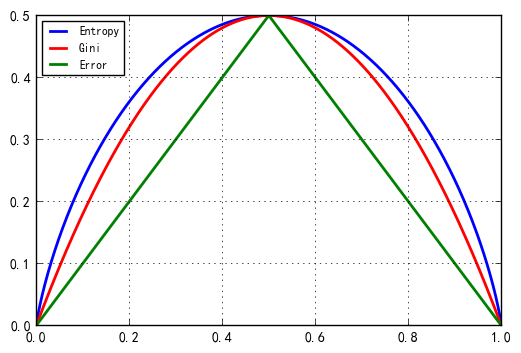

In [83]:
# Comparison of Gini Index, entropy and Error 

p = np.arange(0.001, 1, 0.001, dtype = np.float)
gini = 2 * p * (1 - p)
h = - (p * np.log2(p) + (1 - p) * np.log2(1 - p)) /2  # half entropy 
err = 1 - np.max(np.vstack((p, 1 - p)), 0)
plt.plot(p, h, 'b-', linewidth = 2, label = 'Entropy')
plt.plot(p, gini, 'r-', linewidth = 2, label = 'Gini')
plt.plot(p, err, 'g-', linewidth = 2, label = 'Error')
plt.grid(True)
plt.legend(loc = 'upper left', fontsize = 'small')
plt.show()
# help(plt.legend)

In [5]:
# Functions

class Treenode:
    def __init__(self):
        self.sample = []  # what samples in a node 
        self.feature = -1  # feature 
        self.value = 0 
        self.type = -1
        self.left = -1
        self.right = -1
        self.gini = 0

        
def gini_coefficient(self):
    types = {}
    for i in self.sample:
        type = data[i][-1]
        if type.has_key(type):
            types[type] += 1
        else:
            types[type] = 1
    pp = 0
    m = float(len(self.sample))
    for t in types:
        pp += (float(types[t]) / m) ** 2
    self.gini = 1 - pp
    max_type = 0
    for t in types:
        if max_type < type[t]:
            max_type = types[t]
            self.type = t
            
def split(self, tree):
    f = self.select_feature()
    self.chooose_value(f, tree)
    
def self_feature(self):
    n = len(data[0])
    if rf:
        return random.randint(0, n - 2)
    gini_f = 1
    f = -1
    for i in range(n - 1):
        g = self.gini_feature(i)
        if gini_f > g:
            gini_f = g
            f = i
    return f



# 
def choose_value(self, f, tree):
    f_max = self.calc_max(f)
    f_min = self.calc_min(f)
    step = (f_max - f_min) / granularity
    if step == 0:
        return f_min
    x_split = 0
    g_split = 1
    for x in numpy.arange(f_min + step, f_max, step):
        if rf:
            x = random.uniform(f_min, f_max)
        g = self.gini_coefficient2(f, x)
        if g_split > g:
            g_split = g
            x_split = x
    if g_split < self.gini:
        self.value = x_split
        self.feature = f 
        t = TreeNode()
        t.sample = self.choose_sample(f, x_split, True)
        t.gini_coefficient()
        self.left = len(tree)
        tree.append(t)
        t = TreeNode()
        t.sample = self.choose_sample(f, x_split, False)
        t.gini_coefficient()
        self.right = len(tree)
        tree.append(t)
        
def predict_tree(d, tree):
    node = tree[0]
    while node.left != -1 and node.right != -1:
        if d[node.feature] < node.value:
            node = tree[node.left]
        else:
            node = tree[node.right]
    return node.type


def predict(d, forest):
    pd = {}
    for tree in forest:
        type = predict_tree(d, tree)
        if pd.has_key(type):
            pd[type] += 1
        else:
            pd[type] = 1
    number = 0
    type = 0.0 
    for p in pd:
        if number < pd[p]:
            number = pd[p]
            type = p
    return type


def decision_tree():
    m = len(data)
    n = len(data[0])
    tree = []
    root = TreeNode()
    if rf:
        root.sample = random_select(alpha)
    else:
        root.sample = [x for x in range(m)]
    root.gini_coefficient()
    tree.append(root)
    first = 0
    last = 1
    for level in range(max_level):
        for node in range(first, last):
            tree[node].split(tree)
        first = last
        last = len(tree)
        print(level + 1, len(tree))
    return tree

### Classification on different pairs of features

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier

In [117]:
iris_feature = 'sepal length', 'sepal width', 'petal length', 'petal width'
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
path = 'Data-and-Output/8.iris.data'  # data path
#  data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
df = pd.read_csv(path, header = 0)
x_prime = df.values[:, :-1]
y = df.values[:, -1]
# x = x[:, :2]  # only select the first two features of x 
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print ('le class: \n',le.classes_)
y = le.transform(y)
print ('Lastest Version, y = \n', y)   # convert y labels 



le class: 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Lastest Version, y = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


Feature：   sepal length  +  sepal width
	 Counts of correct prediction： 122
	 Accurate rate: 81.88%
Feature：   sepal length  +  petal length
	 Counts of correct prediction： 144
	 Accurate rate: 96.64%
Feature：   sepal length  +  petal width
	 Counts of correct prediction： 143
	 Accurate rate: 95.97%
Feature：   sepal width  +  petal length
	 Counts of correct prediction： 142
	 Accurate rate: 95.30%
Feature：   sepal width  +  petal width
	 Counts of correct prediction： 144
	 Accurate rate: 96.64%
Feature：   petal length  +  petal width
	 Counts of correct prediction： 146
	 Accurate rate: 97.99%


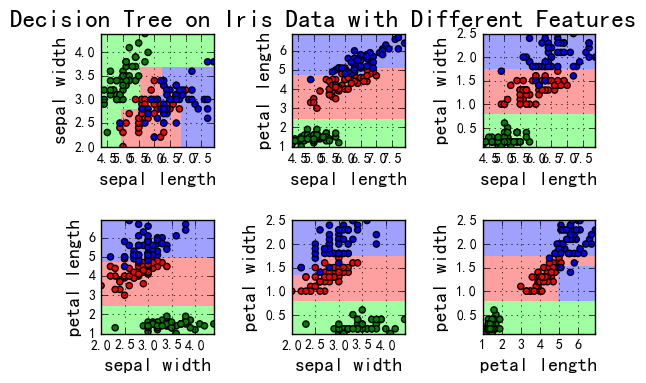

In [123]:
# function to check each feature pair
for i, pair in enumerate(feature_pairs):
        # prepare data
        x = x_prime[:, pair]

        # decision tree
        clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 3)
        dt_clf = clf.fit(x, y)

        # Plot
        N, M = 500, 500  
        x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  
        x2_min, x2_max = x[:, 1].min(), x[:, 1].max() 
        t1 = np.linspace(x1_min, x1_max, N)
        t2 = np.linspace(x2_min, x2_max, M)
        x1, x2 = np.meshgrid(t1, t2)  
        x_test = np.stack((x1.flat, x2.flat), axis=1)  

        # prediction on training data
        y_hat = dt_clf.predict(x)
        y = y.reshape(-1)
        c = np.count_nonzero(y_hat == y)    # count the nonzero values 
        print ('Feature：  ', iris_feature[pair[0]], ' + ', iris_feature[pair[1]])
        print ('\t Counts of correct prediction：', c)
        print ('\t Accurate rate: %.2f%%' % (100 * float(c) / float(len(y))))

        cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
        cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
        y_hat = dt_clf.predict(x_test)  # prediction on mesh grids 
        y_hat = y_hat.reshape(x1.shape)  # reshape 
        plt.subplot(2, 3, i + 1)
        plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  
        plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=cm_dark)  # the actual sample we have 
        plt.xlabel(iris_feature[pair[0]], fontsize=14)
        plt.ylabel(iris_feature[pair[1]], fontsize=14)
        plt.xlim(x1_min, x1_max)
        plt.ylim(x2_min, x2_max)
        plt.grid()


    
plt.suptitle(u'Decision Tree on Iris Data with Different Features', fontsize=18)
plt.tight_layout(2)
plt.subplots_adjust(top = 0.92)
plt.show()


### Decision Tree on Regression

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


In [129]:
# create some pseudo data
N = 100
x = np.random.rand(N) * 6 - 3     # [-3,3)
x.sort()
y = np.sin(x) + np.random.randn(N) * 0.05  # construct y values with some noise 
# print(y)
x = x.reshape(-1, 1)  # x will have N rows and 1 column 
print(x[0:5, ])

[[-2.94124213]
 [-2.90120925]
 [-2.77762776]
 [-2.77006976]
 [-2.70051941]]


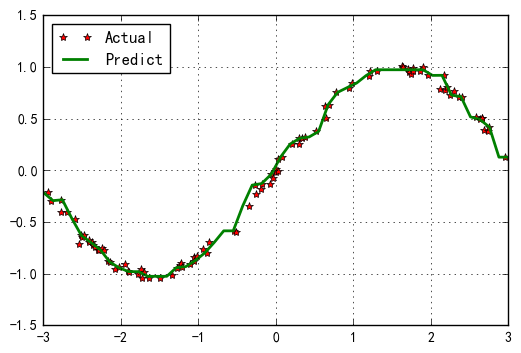

In [131]:
reg = DecisionTreeRegressor(criterion='mse', max_depth = 9)  # use mse criteria 
dt = reg.fit(x, y)
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
y_hat = dt.predict(x_test)
plt.plot(x, y, 'r*', linewidth = 2, label='Actual')
plt.plot(x_test, y_hat, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper left')
plt.grid()
plt.show()

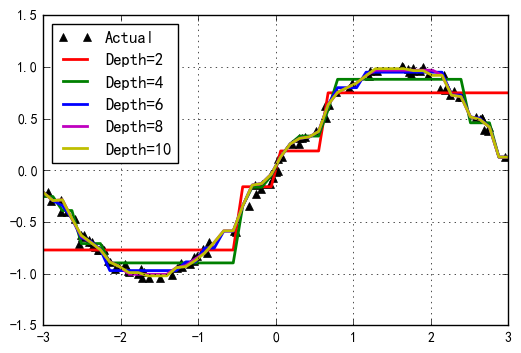

In [132]:
# effect of different max depth   
depth = [2, 4, 6, 8, 10]
clr = 'rgbmy'
reg = [DecisionTreeRegressor(criterion='mse', max_depth=depth[0]),
        DecisionTreeRegressor(criterion='mse', max_depth=depth[1]),
        DecisionTreeRegressor(criterion='mse', max_depth=depth[2]),
        DecisionTreeRegressor(criterion='mse', max_depth=depth[3]),
        DecisionTreeRegressor(criterion='mse', max_depth=depth[4])]

plt.plot(x, y, 'k^', linewidth=2, label='Actual')
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
for i, r in enumerate(reg):
    dt = r.fit(x, y)
    y_hat = dt.predict(x_test)
    plt.plot(x_test, y_hat, '-', color=clr[i], linewidth=2, label='Depth=%d' % depth[i])
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Multiple Output

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [139]:

N = 300
x = np.random.rand(N) * 8 - 4     # [-4,4)
x.sort()
y1 = np.sin(x) + 3 + np.random.randn(N) * 0.1
y2 = np.cos(0.3*x) + np.random.randn(N) * 0.01
# y1 = np.sin(x) + np.random.randn(N) * 0.05
# y2 = np.cos(x) + np.random.randn(N) * 0.1
y = np.vstack((y1, y2))
y = np.vstack((y1, y2)).T
x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的
print(y[0:10, ])




[[ 3.83431503  0.37698846]
 [ 3.75861455  0.36915817]
 [ 3.67769004  0.39360774]
 [ 3.50854381  0.38568825]
 [ 3.60945034  0.40599993]
 [ 3.60730869  0.39313095]
 [ 3.76573362  0.39058968]
 [ 3.59694159  0.39810576]
 [ 3.72398246  0.41386793]
 [ 3.50851957  0.41087051]]


In [148]:
deep = 5
reg = DecisionTreeRegressor(criterion='mse', max_depth=deep)
dt = reg.fit(x, y)

x_test = np.linspace(-4, 4, num=1000).reshape(-1, 1)
# print(x_test)
y_hat = dt.predict(x_test)
print(y_hat[0:10, ])

[[ 3.79646479  0.37307331]
 [ 3.79646479  0.37307331]
 [ 3.79646479  0.37307331]
 [ 3.79646479  0.37307331]
 [ 3.79646479  0.37307331]
 [ 3.79646479  0.37307331]
 [ 3.79646479  0.37307331]
 [ 3.62860211  0.40605162]
 [ 3.62860211  0.40605162]
 [ 3.62860211  0.40605162]]


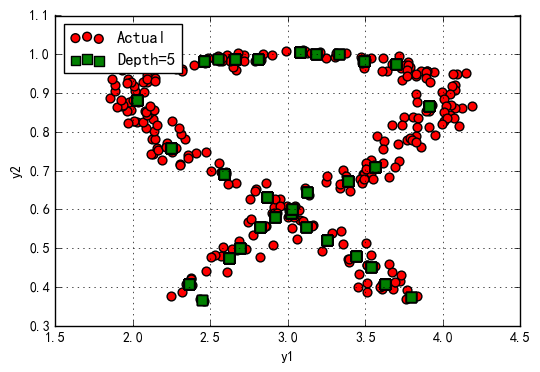

In [149]:
plt.scatter(y[:, 0], y[:, 1], c='r', s=40, label='Actual')
plt.scatter(y_hat[:, 0], y_hat[:, 1], c='g', marker='s', s=50, label='Depth=%d' % deep, alpha=1)
plt.legend(loc='upper left')
plt.xlabel('y1')
plt.ylabel('y2')
plt.grid()
plt.show()

### Random Forest

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier

In [155]:
iris_feature = 'sepal length', 'sepal width', 'petal length', 'petal width'
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
path = 'Data-and-Output/8.iris.data'  # data path
#  data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
df = pd.read_csv(path, header = 0)
x_prime = df.values[:, :-1]
y = df.values[:, -1]
# x = x[:, :2]  # only select the first two features of x 
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print ('le class: \n',le.classes_)
y = le.transform(y)
print ('Lastest Version, y = \n', y)   # convert y labels 

le class: 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Lastest Version, y = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


Feature：   sepal length  +  sepal width
	 Correct Counts： 124
	 Accurate Rate: 83.22%
Feature：   sepal length  +  petal length
	 Correct Counts： 144
	 Accurate Rate: 96.64%
Feature：   sepal length  +  petal width
	 Correct Counts： 145
	 Accurate Rate: 97.32%
Feature：   sepal width  +  petal length
	 Correct Counts： 143
	 Accurate Rate: 95.97%
Feature：   sepal width  +  petal width
	 Correct Counts： 144
	 Accurate Rate: 96.64%
Feature：   petal length  +  petal width
	 Correct Counts： 145
	 Accurate Rate: 97.32%


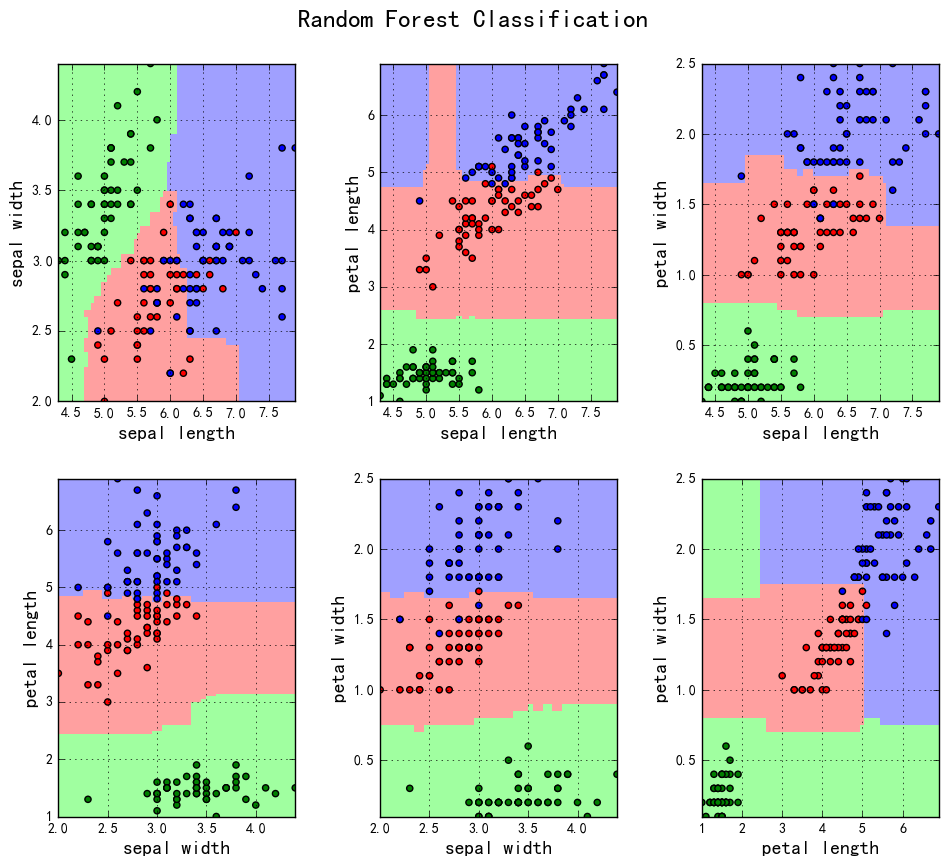

In [158]:
# try to do random forest by pair(better visualization)
feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize = (10, 9), facecolor = '#FFFFFF')

# iterate on different pairs 
for i, pair in enumerate(feature_pairs):
    # data 
    x = x_prime[:, pair]

    # random forest
    clf = RandomForestClassifier(n_estimators = 200, criterion='entropy', max_depth = 4)
    rf_clf = clf.fit(x, y.ravel())

    # Plot
    N, M = 500, 500  
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max() 
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2) 
    x_test = np.stack((x1.flat, x2.flat), axis=1)  

      # prediction
    y_hat = rf_clf.predict(x)
    y = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)   
    print ('Feature：  ', iris_feature[pair[0]], ' + ', iris_feature[pair[1]])
    print ('\t Correct Counts：', c)
    print ('\t Accurate Rate: %.2f%%' % (100 * float(c) / float(len(y))))

        # plot
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = rf_clf.predict(x_test)  
    y_hat = y_hat.reshape(x1.shape)  
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=cm_dark)  # 样本
    plt.xlabel(iris_feature[pair[0]], fontsize=14)
    plt.ylabel(iris_feature[pair[1]], fontsize=14)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
plt.tight_layout(2.5)
plt.subplots_adjust(top=0.92)
plt.suptitle(u'Random Forest Classification', fontsize=18)
plt.show()


In [165]:
# use all the features 
feature_pairs = [[0, 1, 2, 3]]

plt.figure(figsize = (10, 9), facecolor = '#FFFFFF')

# iterate on different pairs 
for i, pair in enumerate(feature_pairs):
    # data 
    x = x_prime

    # random forest
    clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth = 4)
    rf_clf = clf.fit(x, y.ravel())


      # prediction
    y_hat = rf_clf.predict(x)
    y = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)   
    print ('\t Correct Counts：', c)
    print ('\t Accurate Rate: %.2f%%' % (100 * float(c) / float(len(y))))

  

	 Correct Counts： 147
	 Accurate Rate: 98.66%
